In [2]:
from keras.layers import Input, Dense
from keras.models import Model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
datadir = '/Users/sidv88/Documents/Data_Management_2/Data/'
train_data = pd.read_csv(datadir + 'train_rgb.csv')
test_data = pd.read_csv(datadir + 'test_rgb.csv')
print(train_data.shape)
print(test_data.shape)

(50000, 3074)
(10000, 3074)


In [4]:
train_data.head()

,Class,Class Name,0,1,2,3,4,5,6,7,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,6,frog,59,62,63,43,46,45,50,48,...,104,216,184,140,151,118,84,123,92,72
1,9,truck,154,177,187,126,137,136,105,104,...,136,143,133,139,143,134,142,143,133,144
2,9,truck,255,255,255,253,253,253,253,253,...,79,78,85,83,79,85,83,80,86,84
3,4,deer,28,25,10,37,34,19,38,35,...,38,54,47,28,63,56,37,72,65,46
4,1,automobile,170,180,198,168,178,196,177,185,...,78,75,79,82,71,75,78,73,77,80


In [5]:
test_data.head()

,Class,Class Name,0,1,2,3,4,5,6,7,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,3,cat,158,112,49,159,111,47,165,116,...,145,24,77,124,34,84,129,21,67,110
1,8,ship,235,235,235,231,231,231,232,232,...,163,168,183,178,180,195,191,186,200,199
2,8,ship,158,190,222,158,187,218,139,166,...,37,5,6,8,4,5,3,7,8,7
3,0,airplane,155,156,149,167,176,187,176,179,...,53,60,63,50,64,65,52,73,68,50
4,6,frog,65,68,50,70,81,64,48,64,...,147,143,179,136,154,185,146,128,156,117


In [6]:
x_train = train_data.iloc[:, 2:]
print(x_train.shape)
y_train = train_data.iloc[:, [0, 1]]
print(y_train.shape)

(50000, 3072)
(50000, 2)


In [7]:
x_test = test_data.iloc[:, 2:]
print(x_test.shape)
y_test = test_data.iloc[:, [0, 1]]
print(y_test.shape)

(10000, 3072)
(10000, 2)


In [8]:
x_train = np.array(x_train)
x_test = np.array(x_test)

In [9]:
print(x_train.shape)
print(x_test.shape)

(50000, 3072)
(10000, 3072)


In [10]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
print(x_train.shape)
print(x_test.shape)

(50000, 3072)
(10000, 3072)


In [11]:
input_img = Input(shape = (3072, ))
encoded = Dense(units = 128, activation = 'relu')(input_img)
encoded = Dense(units = 128, activation = 'relu')(encoded)
encoded = Dense(units = 64, activation = 'relu')(encoded)
encoded = Dense(units = 64, activation = 'relu')(encoded)
encoded = Dense(units = 32, activation = 'relu')(encoded)
decoded = Dense(units = 64, activation = 'relu')(encoded)
decoded = Dense(units = 64, activation = 'relu')(decoded)
decoded = Dense(units = 128, activation = 'relu')(decoded)
decoded = Dense(units = 128, activation = 'relu')(decoded)
decoded = Dense(units = 3072, activation = 'sigmoid')(decoded)

In [12]:
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)

In [13]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               393344    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                2112

In [14]:
encoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               393344    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
Total params: 424,352
Trainable params: 424,352
Non-trainable params: 0
_____________________________________________________

In [15]:
autoencoder.compile(optimizer = 'adadelta', loss = 'mse', metrics = ['accuracy'])
autoencoder.fit(x_train, x_train, epochs = 50, batch_size = 256, shuffle = True, validation_data = [x_test, x_test])

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 10s 204us/step - loss: 0.0640 - accuracy: 6.0000e-04 - val_loss: 0.0636 - val_accuracy: 6.0000e-04
Epoch 2/50
50000/50000 [==============================] - 10s 205us/step - loss: 0.0639 - accuracy: 6.0000e-04 - val_loss: 0.0636 - val_accuracy: 6.0000e-04
Epoch 3/50
50000/50000 [==============================] - 11s 212us/step - loss: 0.0639 - accuracy: 6.0000e-04 - val_loss: 0.0636 - val_accuracy: 7.0000e-04
Epoch 4/50
50000/50000 [==============================] - 10s 195us/step - loss: 0.0639 - accuracy: 6.0000e-04 - val_loss: 0.0635 - val_accuracy: 6.0000e-04
Epoch 5/50
50000/50000 [==============================] - 10s 195us/step - loss: 0.0638 - accuracy: 5.8000e-04 - val_loss: 0.0635 - val_accuracy: 5.0000e-04
Epoch 6/50
50000/50000 [==============================] - 10s 196us/step - loss: 0.0638 - accuracy: 5.8000e-04 - val_loss: 0.0634 - val_accuracy: 6.0000e-04
Epoch 7/

In [16]:
encoded_test_data = encoder.predict(x_test)
predicted_test_data = autoencoder.predict(x_test)

In [17]:
encoded_test_data.shape

(10000, 32)

In [18]:
y_test

,Class,Class Name
0,3,cat
1,8,ship
2,8,ship
3,0,airplane
4,6,frog
...,...,...
9995,8,ship
9996,3,cat
9997,5,dog
9998,1,automobile


In [19]:
encoded_test_data_df = pd.DataFrame(encoded_test_data)
final_encoded_test_data_df = pd.concat([y_test, encoded_test_data_df], axis = 1)
final_encoded_test_data_df.shape

(10000, 34)

In [20]:
datadir = '/Users/sidv88/Documents/Data_Management_2/Deep_Encoded_Data/'
final_encoded_test_data_df.to_csv(datadir + 'Deep_Encoders_Test_RSADM.csv', index = False)

In [21]:
input_val = input("Enter one of these values {} : ".format(final_encoded_test_data_df['Class Name'].unique()))

Enter one of these values ['cat' 'ship' 'airplane' 'frog' 'automobile' 'truck' 'dog' 'horse' 'deer'
 'bird'] : cat


In [22]:
input_num = input("Enter a number between 0 and 999 : ")

Enter a number between 0 and 999 : 5


In [23]:
from numpy import dot
from numpy.linalg import norm

cosine_similarity = []
cosine_distance = []

for i in range(len(x_test)):
    a = final_encoded_test_data_df.loc[final_encoded_test_data_df['Class Name'] == input_val].iloc[int(input_num), 2:]
    b = final_encoded_test_data_df.iloc[i, 2:]
    cos_sim = dot(a, b)/(norm(a) * norm(b))
    cos_dist = 1 - cos_sim
    cosine_similarity.append(cos_sim)
    cosine_distance.append(cos_dist)
print(len(cosine_similarity))
print(len(cosine_distance))

10000
10000


In [24]:
final_encoded_test_data_df['Cosine Similarity'] = cosine_similarity
final_encoded_test_data_df['Cosine Distance'] = cosine_distance

In [25]:
final_encoded_test_data_df.sort_values(by = ['Cosine Similarity'], ascending = False)

,Class,Class Name,0,1,2,3,4,5,6,7,...,24,25,26,27,28,29,30,31,Cosine Similarity,Cosine Distance
63,3,cat,0.0,3.812714,3.600092,0.0,0.000000,0.000000,0.099760,2.299997,...,0.0,3.353589,1.744551,2.012362,1.268138,0.0,5.132991,0.000000,1.000000,5.960464e-08
2143,9,truck,0.0,2.680034,2.408046,0.0,0.000000,0.000000,0.000211,1.572827,...,0.0,2.255867,1.142427,1.376520,0.913899,0.0,3.618508,0.000000,0.999525,4.745126e-04
822,0,airplane,0.0,3.466169,3.217995,0.0,0.000000,0.000000,0.011788,2.231041,...,0.0,2.947239,1.546322,1.896321,1.275149,0.0,4.918099,0.000000,0.999343,6.566048e-04
9516,9,truck,0.0,4.580598,4.547433,0.0,0.000000,0.000000,0.139054,2.895822,...,0.0,4.011809,2.287211,2.501622,1.596659,0.0,6.229489,0.000000,0.999343,6.569624e-04
4791,9,truck,0.0,4.255493,3.773372,0.0,0.000000,0.000000,0.217512,2.548455,...,0.0,3.387257,1.936476,2.235257,1.330813,0.0,5.662296,0.000000,0.999265,7.345676e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5179,5,dog,0.0,1.269657,0.043418,0.0,0.883773,0.298933,0.989633,0.278833,...,0.0,0.088449,0.171032,0.054414,0.487873,0.0,0.000000,1.069713,0.296172,7.038278e-01
2451,8,ship,0.0,1.259205,0.000000,0.0,1.093774,0.420784,1.103758,0.374938,...,0.0,0.109189,0.139603,0.052020,0.786155,0.0,0.000000,1.299466,0.292854,7.071458e-01
3938,8,ship,0.0,0.794711,0.149666,0.0,0.749029,0.384230,0.790918,0.254294,...,0.0,0.069494,0.135140,0.000000,0.651440,0.0,0.000000,1.077844,0.280363,7.196370e-01
348,8,ship,0.0,0.742198,0.155861,0.0,0.855117,0.421861,0.861178,0.274210,...,0.0,0.000000,0.104734,0.000000,0.853017,0.0,0.000000,1.229845,0.263345,7.366548e-01


In [26]:
cosine_index = final_encoded_test_data_df.sort_values(by = ['Cosine Similarity'], ascending = False).head(10).index

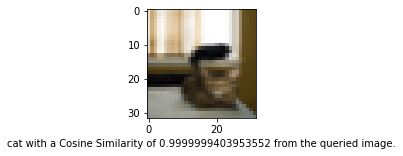

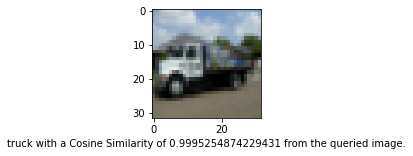

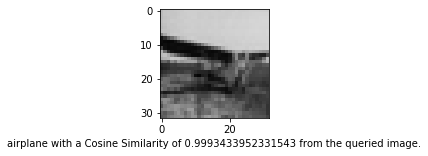

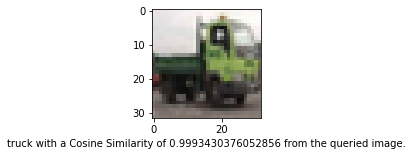

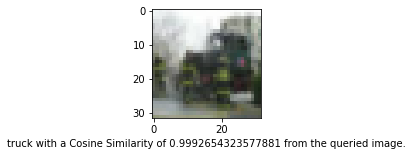

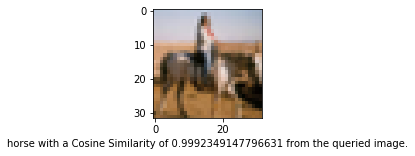

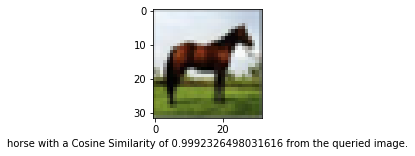

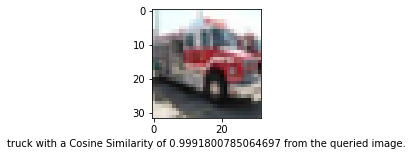

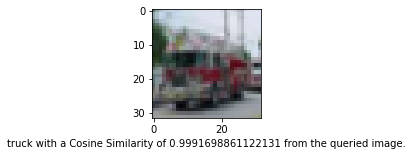

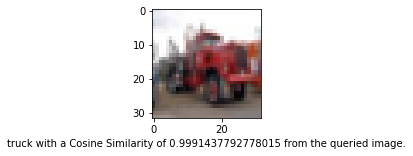

In [27]:
for i in cosine_index:
    plt.figure(figsize = (2, 2))
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.xlabel(final_encoded_test_data_df['Class Name'][i] + ' with a Cosine Similarity of ' + str(final_encoded_test_data_df['Cosine Similarity'][i]) + ' from the queried image.')
    plt.show()

In [28]:
euclidean_distance = []

for i in range(len(x_test)):
    a = final_encoded_test_data_df.loc[final_encoded_test_data_df['Class Name'] == input_val].iloc[int(input_num), 2:]
    b = final_encoded_test_data_df.iloc[i, 2:]
    euc_dist = np.linalg.norm(a-b)
    euclidean_distance.append(euc_dist)
print(len(euclidean_distance))

10000


In [29]:
final_encoded_test_data_df['Euclidean Distance'] = euclidean_distance
final_encoded_test_data_df.sort_values(by = ['Euclidean Distance'])

,Class,Class Name,0,1,2,3,4,5,6,7,...,25,26,27,28,29,30,31,Cosine Similarity,Cosine Distance,Euclidean Distance
63,3,cat,0.0,3.812714,3.600092,0.0,0.000000,0.000000,0.099760,2.299997,...,3.353589,1.744551,2.012362,1.268138,0.0,5.132991,0.000000,1.000000,5.960464e-08,0.000000
7073,9,truck,0.0,3.669303,3.793478,0.0,0.000000,0.000000,0.138704,2.128356,...,3.236986,1.908603,2.147968,0.963523,0.0,4.769196,0.000000,0.997783,2.216637e-03,0.758490
9047,4,deer,0.0,3.948413,3.542847,0.0,0.000000,0.000000,0.000000,2.529557,...,3.131115,1.813725,2.049212,1.315505,0.0,5.719798,0.000000,0.998198,1.802385e-03,0.778588
9667,9,truck,0.0,3.829452,3.230138,0.0,0.000000,0.000000,0.179787,2.316214,...,2.969322,1.593456,2.101333,1.001565,0.0,5.215463,0.000000,0.997986,2.014279e-03,0.783495
9938,9,truck,0.0,4.062326,3.346092,0.0,0.000000,0.000000,0.167721,2.303957,...,2.985665,1.762475,2.226061,0.930921,0.0,5.331378,0.000000,0.997557,2.443016e-03,0.787041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5156,5,dog,0.0,0.806448,0.125742,0.0,0.832404,0.467324,1.003750,0.182025,...,0.000000,0.098036,0.000000,0.813648,0.0,0.000000,1.153451,0.254793,7.452074e-01,10.939060
9801,6,frog,0.0,9.070646,2.763982,0.0,2.527523,0.842438,6.629218,0.266344,...,3.668265,2.511568,3.078005,0.000000,0.0,1.178252,0.542195,0.654751,3.452495e-01,11.137875
4336,9,truck,0.0,10.195182,5.182840,0.0,0.127258,0.000000,2.441948,2.785120,...,4.880038,4.510631,4.264452,0.000000,0.0,8.571229,0.000000,0.956317,4.368305e-02,11.165099
3471,1,automobile,0.0,10.433838,5.829155,0.0,0.000000,0.000000,2.268299,3.661499,...,5.767510,4.403234,4.495072,0.147347,0.0,10.108676,0.000000,0.972072,2.792805e-02,12.837515


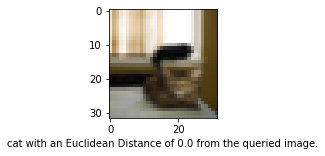

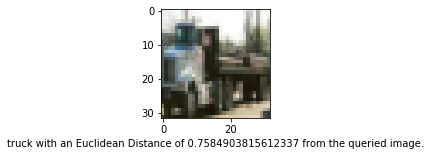

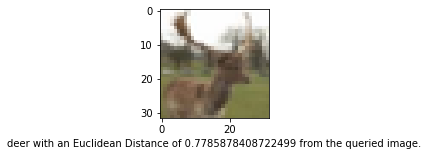

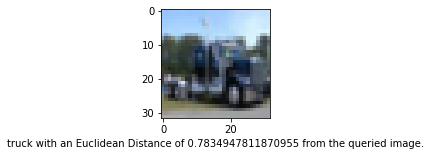

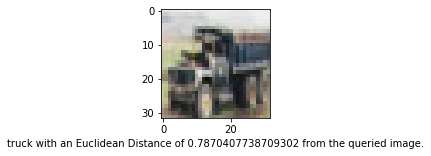

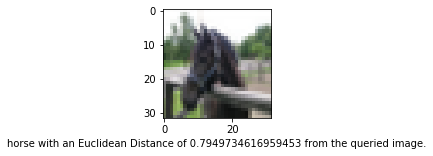

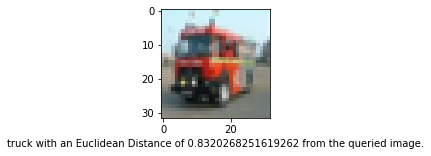

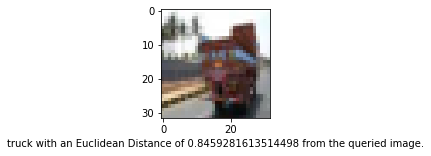

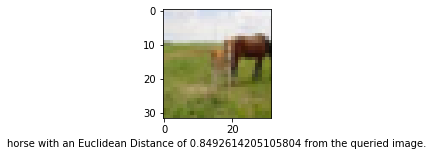

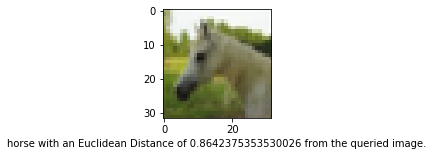

In [30]:
euclidean_index = final_encoded_test_data_df.sort_values(by = ['Euclidean Distance']).head(10).index

for i in euclidean_index:
    plt.figure(figsize = (2, 2))
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.xlabel(final_encoded_test_data_df['Class Name'][i] + ' with an Euclidean Distance of ' + str(final_encoded_test_data_df['Euclidean Distance'][i]) + ' from the queried image.')
    plt.show()